# household_power_consumption.csv Models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pandas as pd

In [3]:
df = pd.read_csv('core\static\data\household_power_consumption_processed.csv', sep=',', low_memory=False)
df_datetime = pd.read_csv('core\static\data\household_power_consumption_datetime_processed.csv', sep=',', low_memory=False)
df.isnull().sum()
df_datetime.isnull().sum()

Datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Regression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

X = df[['Month', 'Day', 'Weekday', 'Hour']]
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear Regression:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Decision Tree Regression:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forest:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

Linear Regression:
mean squared error: 1.0161300098782997
root mean squared error: 1.0080327424634081
r2 score: 0.08437353750557064

Decision Tree Regression:
mean squared error: 0.3201926088686721
root mean squared error: 0.5658556431358374
r2 score: 0.7114770522224828



KeyboardInterrupt: 

## Support Vector Machine

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR, NuSVR, LinearSVR
from math import sqrt

subset_df = df.head(int(len(df) * 0.1))
subset_df_datetime= df_datetime.head(int(len(df_datetime) * 0.1))

X = subset_df[['Year', 'Month', 'Day', 'Weekday', 'Hour']]
y = subset_df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("SVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = NuSVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("NuSVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = LinearSVR(random_state=42, dual="auto", max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("LinearSVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

SVR:
mean squared error: 1.6083436903968689
root mean squared error: 1.268204908678747
r2 score: 0.005018400567125436

NuSVR:
mean squared error: 1.5727541439064692
root mean squared error: 1.2540949501160066
r2 score: 0.027035425971298044

LinearSVR:
mean squared error: 3.1129607611038046
root mean squared error: 1.7643584559561032
r2 score: -0.9257940299380629



C:\Users\Axel\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
df_datetime.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# df_datetime.set_index('Datetime', inplace=True)
# df_datetime = df_datetime.asfreq('min')

## ARIMA

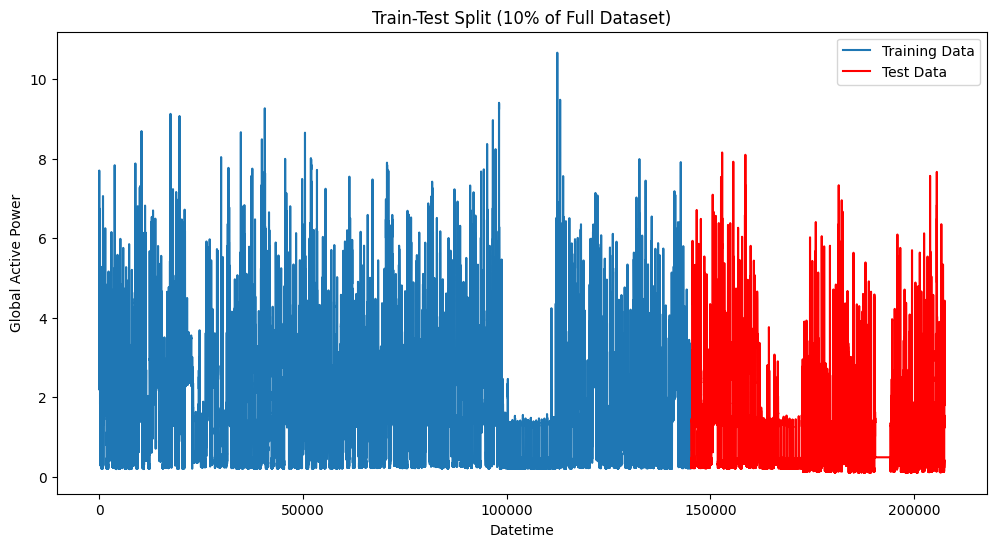

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:               145267
Model:                  ARIMA(5, 1, 0)   Log Likelihood              -55896.473
Date:                 Tue, 11 Jun 2024   AIC                         111804.946
Time:                         00:56:22   BIC                         111864.264
Sample:                              0   HQIC                        111822.650
                              - 145267                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0523      0.001    -44.869      0.000      -0.055      -0.050
ar.L2         -0.2348      0.001   -196.709      0.000      -0.237      -0.232
ar.L3         -0.1516      0.001   -128.794 

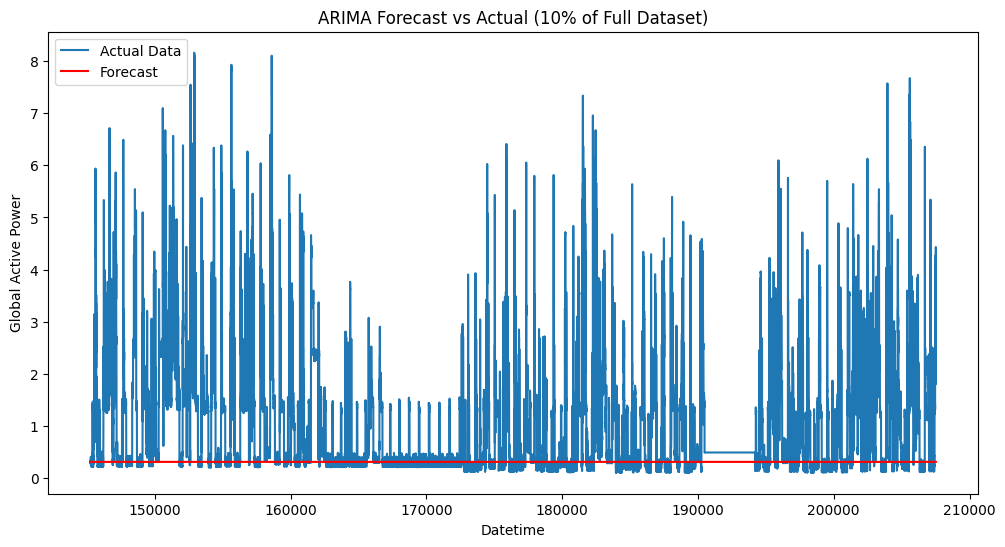

Mean Squared Error: 1.47754467704716


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

subset_df = df_datetime.head(int(len(df_datetime ) * 0.1))

split_ratio = 0.7
split_point = int(len(subset_df) * split_ratio)
train, test = subset_df[:split_point], subset_df[split_point:]

train_series = train['Global_active_power']
test_series = test['Global_active_power']

plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Test Data', color='red')
plt.title('Train-Test Split (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

model = ARIMA(train_series, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Data')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

mse = mean_squared_error(test_series, forecast)
print(f'Mean Squared Error: {mse}')

### ADF Test

De Augmented Dickey-Fuller (ADF)-testresultaten geven aan dat de p-waarde aanzienlijk lager is dan 0,05, wat erop wijst dat de reeks stationair is en geen verdere differentiatie vereist.

Gezien dit alles kunnen we ons concentreren op de andere stappen om de prestaties van het ARIMA-model te verbeteren. Laten we proberen de ARIMA-parameters aan te passen op basis van de ACF- en PACF-grafieken en ervoor te zorgen dat het model de trends effectief vastlegt.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -18.322280581964996
p-value: 2.2645585671964898e-30


### ACF and PACF Plots

De ACF- en PACF-grafieken bieden waardevolle informatie voor het identificeren van de ARIMA-parameters. Zo interpreteert u deze plots:

ACF-plot:

De eerste significante piek bij lag 1 suggereert dat 
𝑞
q kan 1 zijn.
PACF-plot:

De eerste significante piek bij lag 1 suggereert dat 
𝑝
p kan 1 zijn.
Gegeven deze interpretaties kunnen we het ARIMA(1,1,1)-model proberen. Als de resultaten niet bevredigend zijn, kunnen we experimenteren met termen van hogere orde.

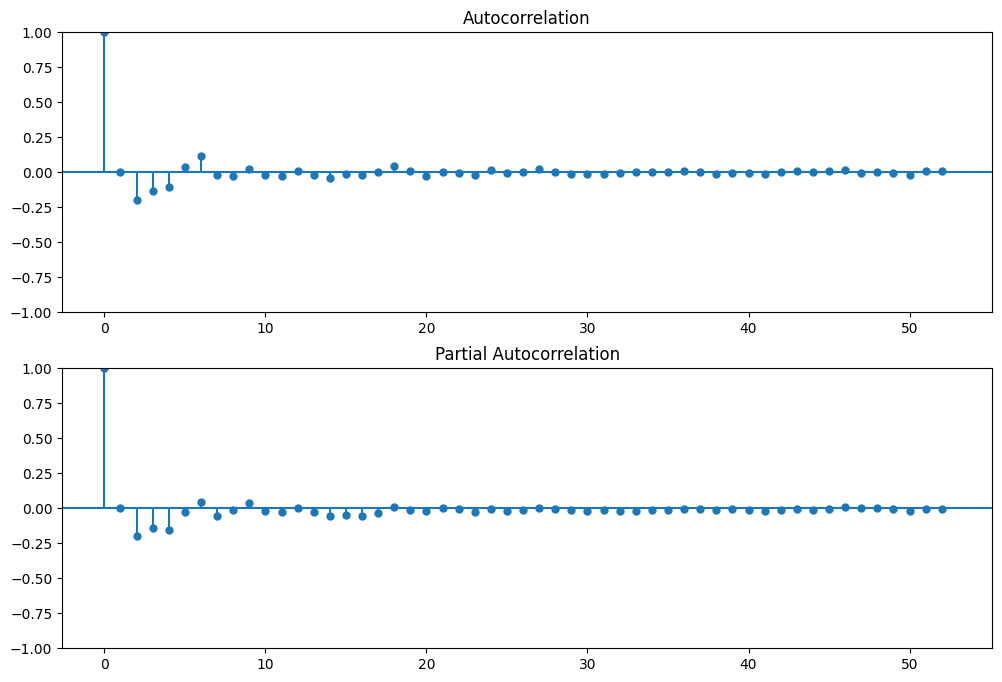

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_series.diff().dropna(), ax=ax[0])
plot_pacf(train_series.diff().dropna(), ax=ax[1])
plt.show()

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:               145267
Model:                  ARIMA(1, 1, 1)   Log Likelihood              -58726.892
Date:                 Tue, 11 Jun 2024   AIC                         117459.784
Time:                         00:57:05   BIC                         117489.443
Sample:                              0   HQIC                        117468.636
                              - 145267                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7610      0.002    370.334      0.000       0.757       0.765
ma.L1         -0.9031      0.002   -589.701      0.000      -0.906      -0.900
sigma2         0.1314      0.000    825.941 

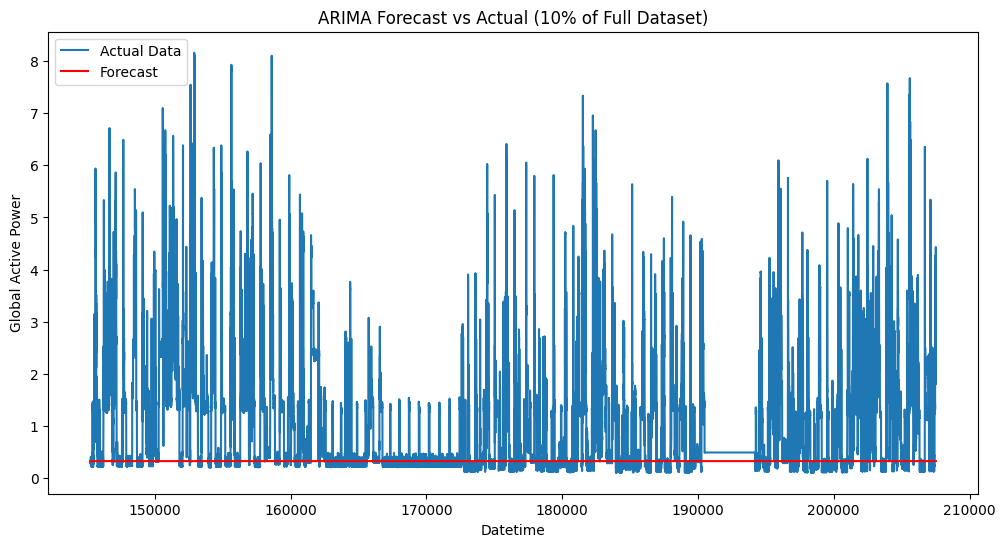

Mean Squared Error: 1.4587727276821634


In [ ]:

model = ARIMA(train_series, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Data')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

mse = mean_squared_error(test_series, forecast)
print(f'Mean Squared Error: {mse}')

In [ ]:
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_series_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1)).flatten()
test_series_scaled = scaler.transform(test_series.values.reshape(-1, 1)).flatten()

# model = auto_arima(train_series_scaled, seasonal=False, trace=True,
#                    error_action='ignore', suppress_warnings=True,
#                    stepwise=True)

# print(model.summary())

# best_order = model.order
# model_fit = ARIMA(train_series_scaled, order=best_order).fit()

# forecast_scaled = model_fit.forecast(steps=len(test_series_scaled))
# forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# plt.figure(figsize=(12, 6))
# plt.plot(test_series.index, test_series, label='Actual Data')
# plt.plot(test_series.index, forecast, label='Forecast', color='red')
# plt.title(f'ARIMA Forecast vs Actual (10% of Full Dataset)')
# plt.xlabel('Datetime')
# plt.ylabel('Global Active Power')
# plt.legend()
# plt.show()

# mse = mean_squared_error(test_series, forecast)
# print(f'Mean Squared Error: {mse}')

## GRU

GRU (gated Recurrent Unit) is een type neuraal netwerk speciaal ontworpen voor het verwerken van sequentiele data. Het is een variant van LSTM(Long Short-Term Memory) waar later nog naar gekeken word. GRU gaat in theorie beter om met lange-termijnafhankelijkheden.

Voorbeelden van toepassing:
- Taalmodelleren en Tekstgeneratie
- Tijdreeksvoorspelling
- Spraakherkenning
- Machinevertalen

Tijdreeksvoorspelling komt ter sprake in dit geval

Num GPUs Available:  1
   Global_active_power  Month  Day  Weekday  Hour  Minute
0                4.216     12   16        5    17      24
1                5.360     12   16        5    17      25
2                5.374     12   16        5    17      26
3                5.388     12   16        5    17      27
4                3.666     12   16        5    17      28
Shapes: X=(144394, 720, 6), y=(144394, 154)
Shapes: X=(61385, 720, 6), y=(61385, 154)
Epoch 1/20
2257/2257 [==============================] - 192s 83ms/step - loss: 0.1040
Epoch 2/20
2257/2257 [==============================] - 161s 71ms/step - loss: 0.0701
Epoch 3/20
2257/2257 [==============================] - 178s 79ms/step - loss: 0.0677
Epoch 4/20
2257/2257 [==============================] - 157s 69ms/step - loss: 0.0643
Epoch 5/20
2257/2257 [==============================] - 158s 70ms/step - loss: 0.0617
Epoch 6/20
2257/2257 [==============================] - 157s 70ms/step - loss: 0.0587
Epoch 7/20
2257/2257 [=====

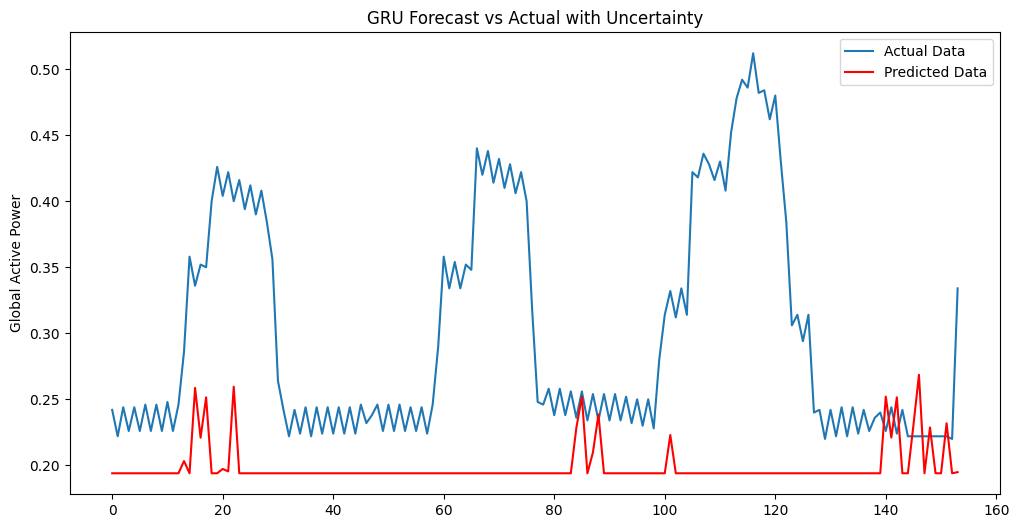

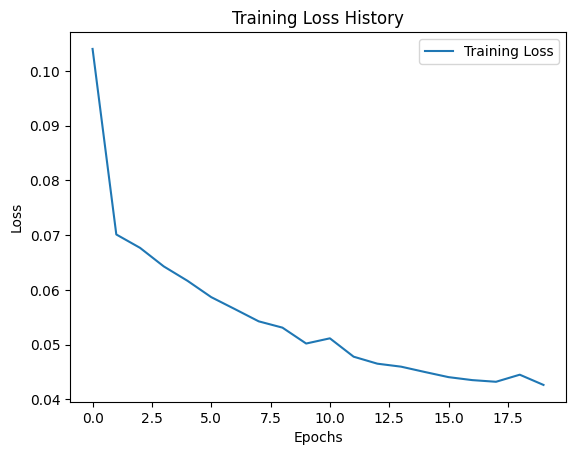

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import L1L2
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

n_sequence_past = 720
n_ahead_prediction = 154 

# Load the data
df_GRU = pd.read_csv('core/static/data/household_power_consumption_processed.csv', sep=',', low_memory=False)
subset_df = df_GRU.head(int(len(df_GRU) * 0.1))

# Keep 'Datetime' as a feature
df_GRU = subset_df[['Global_active_power', 'Month', 'Day', 'Weekday', 'Hour', 'Minute']]
print(df_GRU.head())
# Split the data
split_ratio = 0.7
split_point = int(len(df_GRU) * split_ratio)
train, test = df_GRU[:split_point], df_GRU[split_point:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Adjust create_sequences to handle multiple features
def create_sequences(data, seq_length, prediction_length):
    X, y = [], []
    for i in range(len(data) - seq_length - prediction_length + 1):
        seq = data[i:(i + seq_length), :]  # Skip the first column for X
        label = data[(i + seq_length):(i + seq_length + prediction_length), 0]  # First column is the target
        X.append(seq)
        y.append(label)
    arrayX = np.array(X)
    arrayY = np.array(y)
    print(f"Shapes: X={arrayX.shape}, y={arrayY.shape}")
    return arrayX, arrayY


seq_length = n_sequence_past
prediction_length = n_ahead_prediction
X_train, y_train = create_sequences(train_scaled, seq_length, prediction_length)
X_test, y_test = create_sequences(test_scaled, seq_length, prediction_length)

# Model architecture
model = Sequential([
    GRU(40, return_sequences=True, input_shape=(seq_length, train_scaled.shape[1]), kernel_regularizer=L1L2(l1=0.01, l2=0.01)),
    Dropout(0.2),
    BatchNormalization(),
    GRU(80, return_sequences=False),
    Dropout(0.2),
    Dense(prediction_length, activation='relu')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=64)

# Prediction
y_pred = model.predict(X_test)

# Inverse transform for evaluation
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

dummy_features = np.zeros((y_test_reshaped.shape[0], train_scaled.shape[1] - 1))

# Concatenate the reshaped y_test or y_pred with the dummy features to match the scaler's expected input shape
y_test_inv = scaler.inverse_transform(np.concatenate((y_test_reshaped, dummy_features), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred_reshaped, dummy_features), axis=1))[:, 0]

mae = np.mean(np.abs(y_test_inv[:n_ahead_prediction] - y_pred_inv[:n_ahead_prediction]))
print(f'Mean Absolute Error: {mae}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:n_ahead_prediction], label='Actual Data')
plt.plot(y_pred_inv[:n_ahead_prediction], label='Predicted Data', color='red')

plt.title('GRU Forecast vs Actual with Uncertainty')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 39ms/step


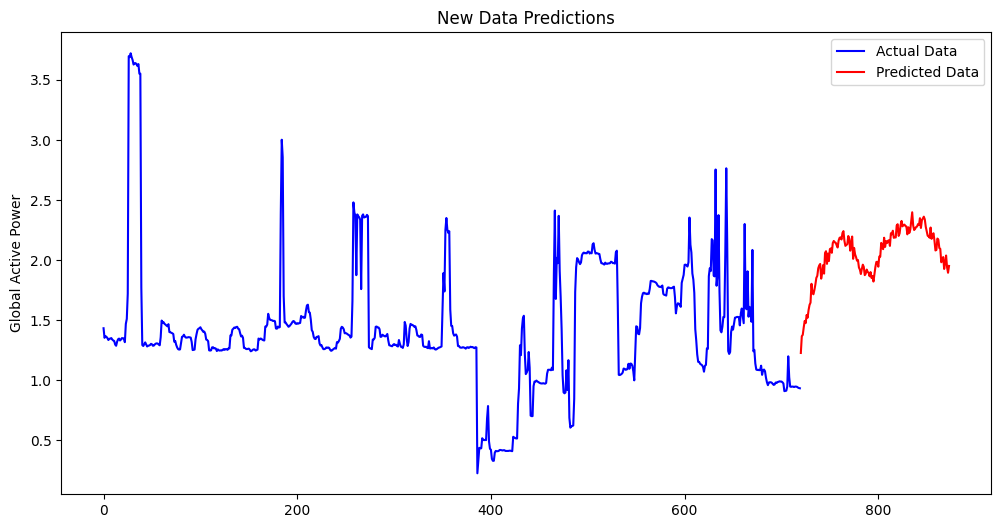

In [2]:
def create_new_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:(i + seq_length), :]
        X.append(seq)
    return np.array(X)

new_data = pd.read_csv('core/static/data/household_power_consumption_processed.csv', sep=',', low_memory=False).tail(720)
new_data = new_data[['Global_active_power', 'Month', 'Day', 'Weekday', 'Hour', 'Minute']]
new_data_scaled = scaler.transform(new_data)

X_new = create_new_sequences(new_data_scaled, seq_length)
y_new_pred_scaled = model.predict(X_new)
y_new_pred_reshaped = y_new_pred_scaled.reshape(-1, 1)
dummy_features_new = np.zeros((y_new_pred_reshaped.shape[0], train_scaled.shape[1] - 1))
y_new_pred_inv = scaler.inverse_transform(np.concatenate((y_new_pred_reshaped, dummy_features_new), axis=1))[:, 0]
input_sequence = new_data['Global_active_power'].values

plt.figure(figsize=(12, 6))
plt.plot(input_sequence, label='Actual Data', color='blue')
x_axis_for_pred = np.arange(len(input_sequence), len(input_sequence) + len(y_new_pred_inv))
plt.plot(x_axis_for_pred, y_new_pred_inv, label='Predicted Data', color='red')
plt.title('New Data Predictions')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

## LSTM

Num GPUs Available:  1
   Global_active_power  Month  Day  Weekday  Hour  Minute
0                4.216     12   16        5    17      24
1                5.360     12   16        5    17      25
2                5.374     12   16        5    17      26
3                5.388     12   16        5    17      27
4                3.666     12   16        5    17      28
Shapes: X=(144394, 720, 6), y=(144394, 154)
Shapes: X=(61385, 720, 6), y=(61385, 154)
Epoch 1/20
2257/2257 [==============================] - 279s 122ms/step - loss: 0.1030
Epoch 2/20
2257/2257 [==============================] - 214s 95ms/step - loss: 0.0707
Epoch 3/20
2257/2257 [==============================] - 210s 93ms/step - loss: 0.0700
Epoch 4/20
2257/2257 [==============================] - 222s 98ms/step - loss: 0.0695
Epoch 5/20
2257/2257 [==============================] - 217s 96ms/step - loss: 0.0677
Epoch 6/20
2257/2257 [==============================] - 207s 92ms/step - loss: 0.0677
Epoch 7/20
2257/2257 [====

INFO:tensorflow:Assets written to: ram://50ca36c9-e893-4c6d-93f9-ee37bf9f1e7a/assets


INFO:tensorflow:Assets written to: ram://50ca36c9-e893-4c6d-93f9-ee37bf9f1e7a/assets


1919/1919 [==============================] - 67s 35ms/step
Mean Absolute Error: 0.09585050209340723


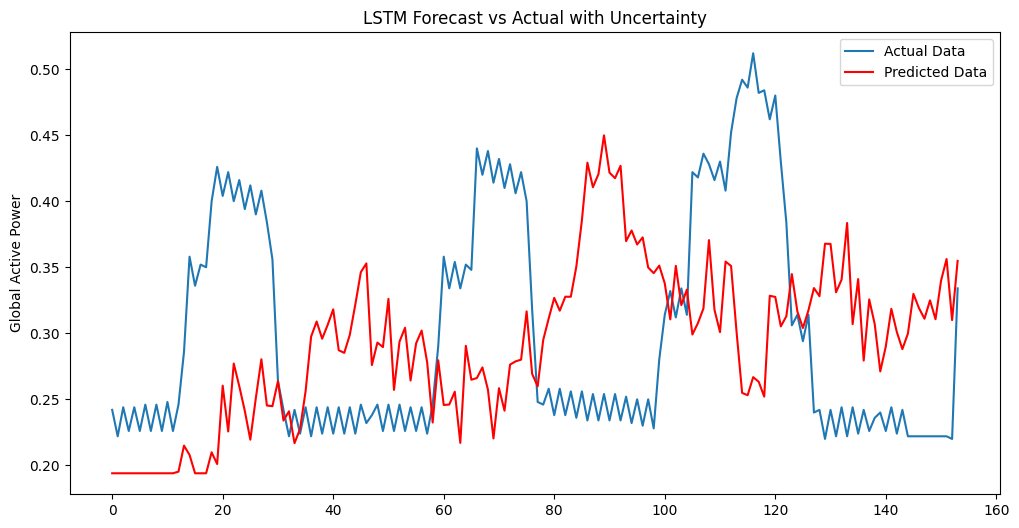

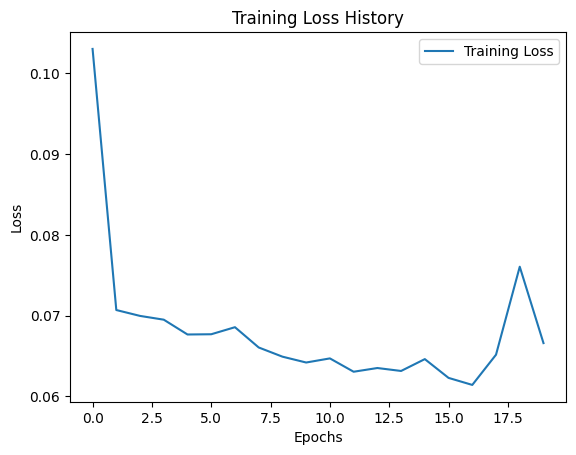

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import L1L2
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle

# GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

n_sequence_past = 720
n_ahead_prediction = 154 

# Load the data
df_LSTM = pd.read_csv('core/static/data/household_power_consumption_processed.csv', sep=',', low_memory=False)
subset_df = df_LSTM.head(int(len(df_LSTM) * 0.1))

# Keep 'Datetime' as a feature
df_LSTM = subset_df[['Global_active_power', 'Month', 'Day', 'Weekday', 'Hour', 'Minute']]
print(df_LSTM.head())
# Split the data
split_ratio = 0.7
split_point = int(len(df_LSTM) * split_ratio)
train, test = df_LSTM[:split_point], df_LSTM[split_point:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Adjust create_sequences to handle multiple features
def create_sequences(data, seq_length, prediction_length):
    X, y = [], []
    for i in range(len(data) - seq_length - prediction_length + 1):
        seq = data[i:(i + seq_length), :]  # Skip the first column for X
        label = data[(i + seq_length):(i + seq_length + prediction_length), 0]  # First column is the target
        X.append(seq)
        y.append(label)
    arrayX = np.array(X)
    arrayY = np.array(y)
    print(f"Shapes: X={arrayX.shape}, y={arrayY.shape}")
    return arrayX, arrayY


seq_length = n_sequence_past
prediction_length = n_ahead_prediction
X_train, y_train = create_sequences(train_scaled, seq_length, prediction_length)
X_test, y_test = create_sequences(test_scaled, seq_length, prediction_length)

# Model architecture
model = Sequential([
    LSTM(40, return_sequences=True, input_shape=(seq_length, train_scaled.shape[1]), kernel_regularizer=L1L2(l1=0.01, l2=0.01)),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(80, return_sequences=False),
    Dropout(0.2),
    Dense(prediction_length, activation='relu')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=64)

# model.save('core/static/data/lstm_model_pv.h5')
with open('core/static/data/lstm_model_household.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('core/static/data/lstm_scaler_household.pkl', 'wb') as f:
    pickle.dump(scaler, f)

y_pred = model.predict(X_test)

y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

dummy_features = np.zeros((y_test_reshaped.shape[0], train_scaled.shape[1] - 1))

y_test_inv = scaler.inverse_transform(np.concatenate((y_test_reshaped, dummy_features), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred_reshaped, dummy_features), axis=1))[:, 0]

mae = np.mean(np.abs(y_test_inv[:n_ahead_prediction] - y_pred_inv[:n_ahead_prediction]))
print(f'Mean Absolute Error: {mae}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:n_ahead_prediction], label='Actual Data')
plt.plot(y_pred_inv[:n_ahead_prediction], label='Predicted Data', color='red')

plt.title('LSTM Forecast vs Actual with Uncertainty')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 65ms/step


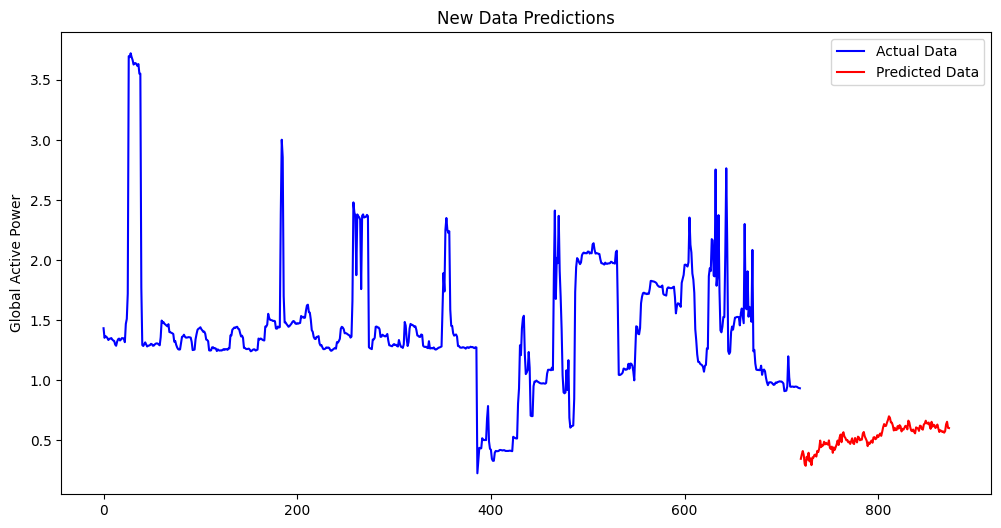

In [8]:
def create_new_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:(i + seq_length), :]
        X.append(seq)
    return np.array(X)

new_data = pd.read_csv('core/static/data/household_power_consumption_processed.csv', sep=',', low_memory=False).tail(720)
new_data = new_data[['Global_active_power', 'Month', 'Day', 'Weekday', 'Hour', 'Minute']]
new_data_scaled = scaler.transform(new_data)

X_new = create_new_sequences(new_data_scaled, seq_length)
y_new_pred_scaled = model.predict(X_new)
y_new_pred_reshaped = y_new_pred_scaled.reshape(-1, 1)
dummy_features_new = np.zeros((y_new_pred_reshaped.shape[0], train_scaled.shape[1] - 1))
y_new_pred_inv = scaler.inverse_transform(np.concatenate((y_new_pred_reshaped, dummy_features_new), axis=1))[:, 0]
input_sequence = new_data['Global_active_power'].values

plt.figure(figsize=(12, 6))
plt.plot(input_sequence, label='Actual Data', color='blue')
x_axis_for_pred = np.arange(len(input_sequence), len(input_sequence) + len(y_new_pred_inv))
plt.plot(x_axis_for_pred, y_new_pred_inv, label='Predicted Data', color='red')
plt.title('New Data Predictions')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()


## Transformers


Hier klopt dus helemaal niks van

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 154, 4)]     0           []                               
                                                                                                  
 layer_normalization_2 (LayerNo  (None, 154, 4)      8           ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_1 (MultiH  (None, 154, 4)      4868        ['layer_normalization_2[0][0]',  
 eadAttention)                                                    'layer_normalization_2[0][0]']  
                                                                                            

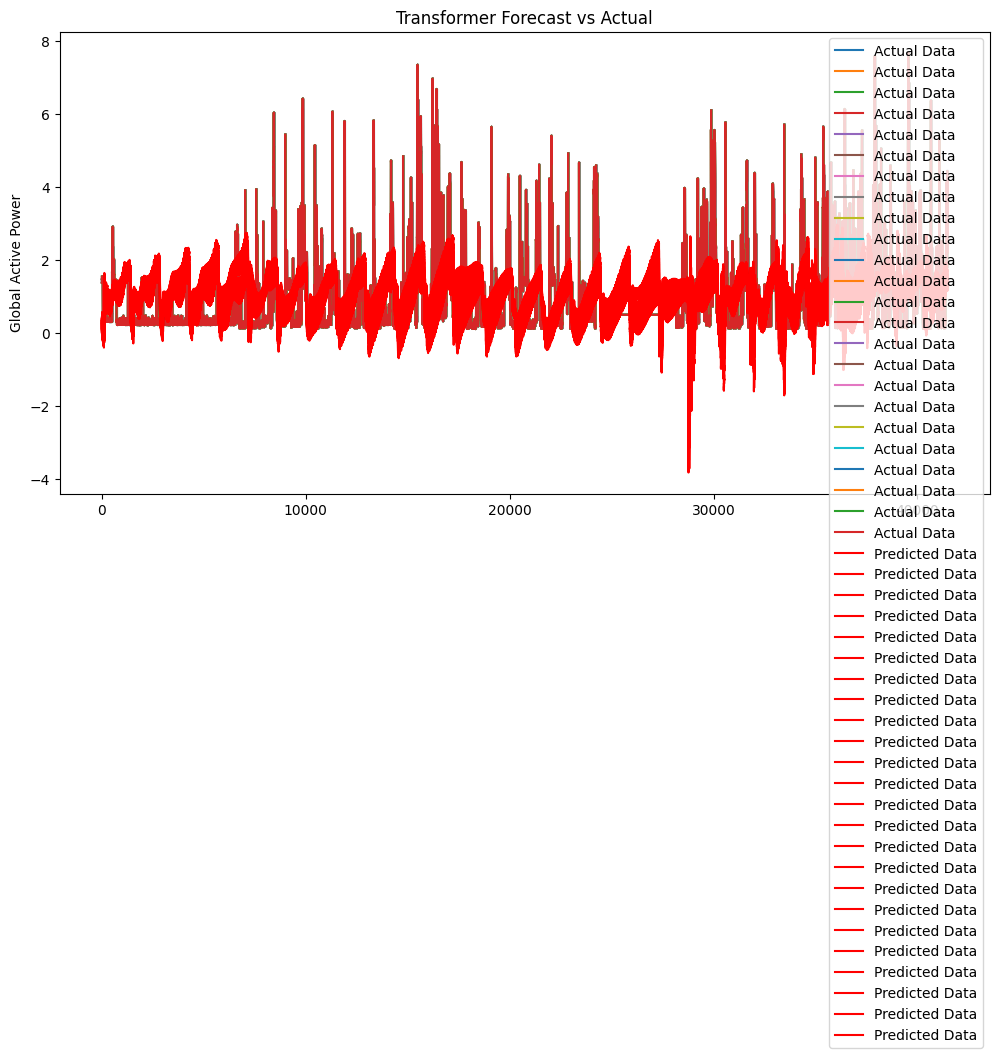

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LayerNormalization, Dropout, Flatten, MultiHeadAttention
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
df_datetime = pd.read_csv('core/static/data/household_power_consumption_processed.csv', sep=',', low_memory=False)
subset_df = df_datetime.head(int(len(df_datetime) * 0.1))

# Define sequence and prediction lengths
sequence_length = 154
prediction_length = 24

# Function to create sequences
def create_sequences(X, y, sequence_length, prediction_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length - prediction_length + 1):
        X_seq.append(X[i:(i + sequence_length)]) 
        y_seq.append(y[i + sequence_length:i + sequence_length + prediction_length]) # First column is the target
    
    return np.array(X_seq), np.array(y_seq)

# Prepare data
X = subset_df[['Month', 'Day', 'Weekday', 'Hour']].values
y = subset_df['Global_active_power'].values

X, y = create_sequences(X, y, sequence_length, prediction_length)
split_idx = int(len(X) * 0.8)

# Split the data maintaining the temporal order
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Transformer encoder function
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Adjust model to handle sequences
input_shape = (sequence_length, X_train.shape[2])  # Adjust for sequence input
inputs = Input(shape=input_shape)

# Transformer encoder
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=4)

x = Flatten()(x)
outputs = Dense(prediction_length)(x) 

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mae")

# Model summary
model.summary()

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)
print("Transformer:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")

# Plot graph
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Data')
plt.plot(y_pred, label='Predicted Data', color='red')
plt.title('Transformer Forecast vs Actual')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()